In [53]:
import torch
import matplotlib.pyplot as plt

In [33]:
num_batches_per_epoch = 375
num_epochs = 8

In [2]:
pos_class_e1 = torch.load("logs/pos_class_losses_0.pt")
pos_class_e2 = torch.load("logs/pos_class_losses_375.pt")
pos_class_e3 = torch.load("logs/pos_class_losses_750.pt")

In [32]:
list(range(0, num_batches_per_epoch*num_epochs, num_batches_per_epoch))

[0, 375, 750, 1125, 1500]

In [34]:
pos_class = []
for i in range(0, num_batches_per_epoch*num_epochs, num_batches_per_epoch):
    pos_class.append(torch.load(f"logs/run2/pos_class_losses_{i}.pt"))
pos_class = torch.stack(pos_class)

In [35]:
pos_class.shape

torch.Size([8, 8, 576, 4])

In [36]:
neg_class = []
for i in range(0, num_batches_per_epoch*num_epochs, num_batches_per_epoch):
    neg_class.append(torch.load(f"logs/run2/neg_class_losses_{i}.pt"))
neg_class = torch.stack(neg_class)

In [37]:
matches = []
for i in range(0, num_batches_per_epoch*num_epochs, num_batches_per_epoch):
    matches.append(torch.load(f"logs/run2/matches_{i}.pt"))
matches = torch.stack(matches)

In [38]:
probs = []
for i in range(0, num_batches_per_epoch*num_epochs, num_batches_per_epoch):
    probs.append(torch.load(f"logs/run2/probabilitae_{i}.pt"))
probs = torch.stack(probs)

In [68]:
e_idx = test_example_idx_in_batch = 4

In [82]:
pos_class_losses = torch.stack([pos_class[i, e_idx, matches[i, e_idx, 0], :] for i in range(num_epochs)])
pos_class_losses

tensor([[7.0051e+00, 6.9639e+00, 6.9176e+00, 6.9236e+00],
        [1.0870e-02, 8.7821e-03, 5.6117e-02, 3.3452e-01],
        [2.8154e-04, 5.3076e-01, 1.3003e+00, 6.2299e-01],
        [5.4526e-04, 1.7995e+00, 1.2926e+00, 6.3271e-01],
        [4.0320e-03, 5.4493e-01, 9.2906e-01, 6.9320e-01],
        [2.3663e-02, 1.9519e+00, 4.5935e-01, 1.7378e+00],
        [5.8606e-03, 1.7242e+00, 1.9262e+00, 2.5486e+00],
        [1.9747e-05, 2.6863e+00, 1.3938e+00, 2.3873e+00]], device='cuda:0',
       grad_fn=<StackBackward0>)

In [70]:
# Pos class loss for the matched box are lower for pos class than for Negative class

In [83]:
neg_class_losses = torch.stack([neg_class[i, e_idx, matches[i, e_idx, 0], :] for i in range(num_epochs)])
neg_class_losses

tensor([[2.8265e-19, 3.5705e-19, 4.5839e-19, 4.4756e-19],
        [3.5780e-01, 3.9391e-01, 1.2875e-01, 1.2521e-02],
        [1.0581e+00, 4.1003e-03, 8.3338e-05, 2.5210e-03],
        [9.2564e-01, 6.1843e-06, 8.6626e-05, 2.3971e-03],
        [5.3389e-01, 3.8009e-03, 5.3604e-04, 1.7563e-03],
        [2.3708e-01, 2.7136e-06, 6.0546e-03, 8.5975e-06],
        [4.6522e-01, 9.2396e-06, 3.1216e-06, 9.5932e-08],
        [1.5801e+00, 4.3420e-08, 5.1738e-05, 2.4066e-07]], device='cuda:0',
       grad_fn=<StackBackward0>)

In [72]:
# Neg class loss for the matched box are higher for pos class than for Negative class

In [73]:
ps = torch.stack([probs[i, e_idx, matches[i, e_idx, 0], :] for i in range(num_epochs)])

In [74]:
ps.shape

torch.Size([8, 4])

In [75]:
pos_class_loss = -(0.5) * torch.pow(1-ps, 2) * torch.log(ps)

In [76]:
neg_class_loss = -(0.5) * torch.pow(ps, 2) * torch.log(1-ps)

In [77]:
pos_class_loss

tensor([[7.0051e+00, 6.9639e+00, 6.9176e+00, 6.9236e+00],
        [1.0870e-02, 8.7821e-03, 5.6117e-02, 3.3452e-01],
        [2.8154e-04, 5.3076e-01, 1.3003e+00, 6.2299e-01],
        [5.4526e-04, 1.7995e+00, 1.2926e+00, 6.3271e-01],
        [4.0320e-03, 5.4493e-01, 9.2906e-01, 6.9320e-01],
        [2.3663e-02, 1.9519e+00, 4.5935e-01, 1.7378e+00],
        [5.8606e-03, 1.7242e+00, 1.9262e+00, 2.5486e+00],
        [1.9747e-05, 2.6863e+00, 1.3938e+00, 2.3873e+00]], device='cuda:0',
       grad_fn=<MulBackward0>)

In [78]:
neg_class_loss

tensor([[2.8265e-19, 3.5705e-19, 4.5839e-19, 4.4756e-19],
        [3.5780e-01, 3.9391e-01, 1.2875e-01, 1.2521e-02],
        [1.0581e+00, 4.1003e-03, 8.3338e-05, 2.5210e-03],
        [9.2564e-01, 6.1843e-06, 8.6626e-05, 2.3971e-03],
        [5.3389e-01, 3.8009e-03, 5.3604e-04, 1.7563e-03],
        [2.3708e-01, 2.7136e-06, 6.0546e-03, 8.5975e-06],
        [4.6522e-01, 9.2396e-06, 3.1216e-06, 9.5932e-08],
        [1.5801e+00, 4.3420e-08, 5.1738e-05, 2.4066e-07]], device='cuda:0',
       grad_fn=<MulBackward0>)

Text(0.5, 0, 'Epochs')

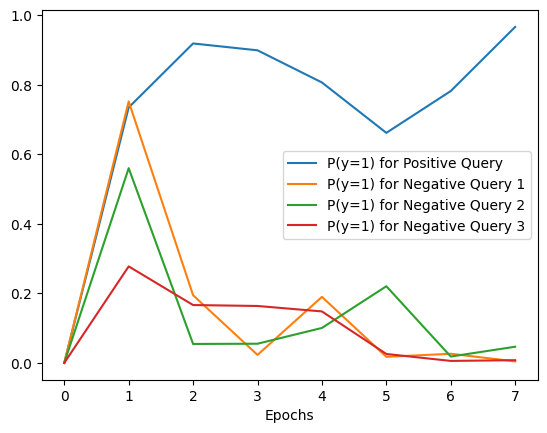

In [79]:
plt.plot(range(num_epochs), ps[:, 0].detach().cpu(), label = "P(y=1) for Positive Query")
for i in range(1,4):
    plt.plot(range(num_epochs), ps[:, i].detach().cpu(), label = f"P(y=1) for Negative Query {i}")
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

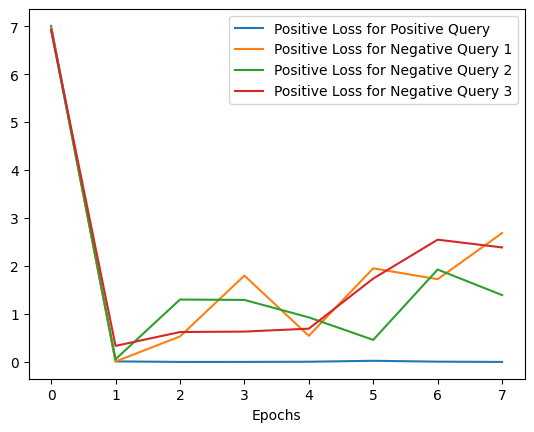

In [86]:
plt.plot(range(num_epochs), pos_class_losses[:, 0].detach().cpu(), label = "Positive Loss for Positive Query")
for i in range(1,4):
    plt.plot(range(num_epochs), pos_class_losses[:, i].detach().cpu(), label = f"Positive Loss for Negative Query {i}")
plt.legend()
plt.xlabel("Epochs")

In [3]:
neg_class_e1 = torch.load("logs/neg_class_losses_0.pt")
neg_class_e2 = torch.load("logs/neg_class_losses_375.pt")
neg_class_e3 = torch.load("logs/neg_class_losses_750.pt")

In [4]:
matches_e1 = torch.load("logs/matches_0.pt")
matches_e2 = torch.load("logs/matches_375.pt")
matches_e3 = torch.load("logs/matches_750.pt")

In [16]:
pos_class_e1[0][matches_e1[0][0]]

tensor([2.4494, 2.5224, 3.6815, 2.5400], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [17]:
pos_class_e2[0][matches_e2[0][0]]

tensor([0.0049, 0.6647, 1.0697, 0.3929], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [18]:
pos_class_e3[0][matches_e3[0][0]]

tensor([0.0324, 0.5291, 0.5291, 0.4913], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [19]:
neg_class_e1[0][matches_e1[0][0]]

tensor([1.6908e-07, 1.1147e-07, 1.2413e-10, 1.0076e-07], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [20]:
neg_class_e2[0][matches_e2[0][0]]

tensor([4.9933e-01, 2.0323e-03, 2.6571e-04, 8.8353e-03], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [21]:
neg_class_e3[0][matches_e3[0][0]]

tensor([0.1941, 0.0041, 0.0041, 0.0051], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [23]:
matches_e3[0][0]

tensor(575)